<a href="https://colab.research.google.com/github/harshvardhan176/ML_LAB_01/blob/main/ML_Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Wmunu.csv')

In [ ]:
#A1
features = df[['pt', 'eta']]
labels = (df['Q'] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

def classification_report(y_true, y_pred):
    return {
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

print("Training Performance:")
print(classification_report(y_train, y_train_pred))
print("\nTesting Performance:")
print(classification_report(y_test, y_test_pred))

Training Performance:
{'Confusion Matrix': array([[22331,  9419],
       [ 7865, 30385]]), 'Precision': 0.7633654909054366, 'Recall': 0.7943790849673202, 'F1 Score': 0.7785635585620212}

Testing Performance:
{'Confusion Matrix': array([[5943, 7540],
       [7066, 9451]]), 'Precision': 0.5562356541698547, 'Recall': 0.5721983411031059, 'F1 Score': 0.5641040945445863}


In [ ]:
# A2
X = df[['pt']]
y = df['MET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R2 Score: {r2:.4f}")

MSE: 281.1593
RMSE: 16.7678
MAPE: 1.0131
R2 Score: -0.0004


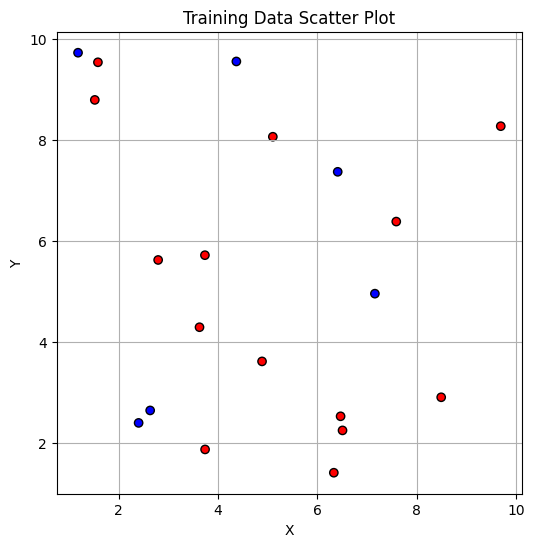

In [ ]:
#A3
np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2))
y_train = np.random.choice([0, 1], 20)

plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title("Training Data Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

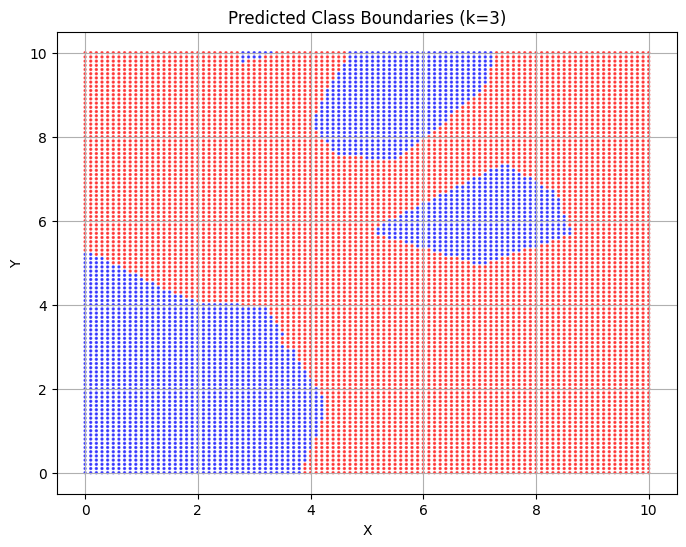

In [ ]:
#A4
test_x, test_y = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_points = np.c_[test_x.ravel(), test_y.ravel()]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
test_preds = knn.predict(test_points)

plt.figure(figsize=(8, 6))
plt.scatter(test_points[:, 0], test_points[:, 1], c=test_preds, cmap='bwr', s=2, alpha=0.6)
plt.title("Predicted Class Boundaries (k=3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

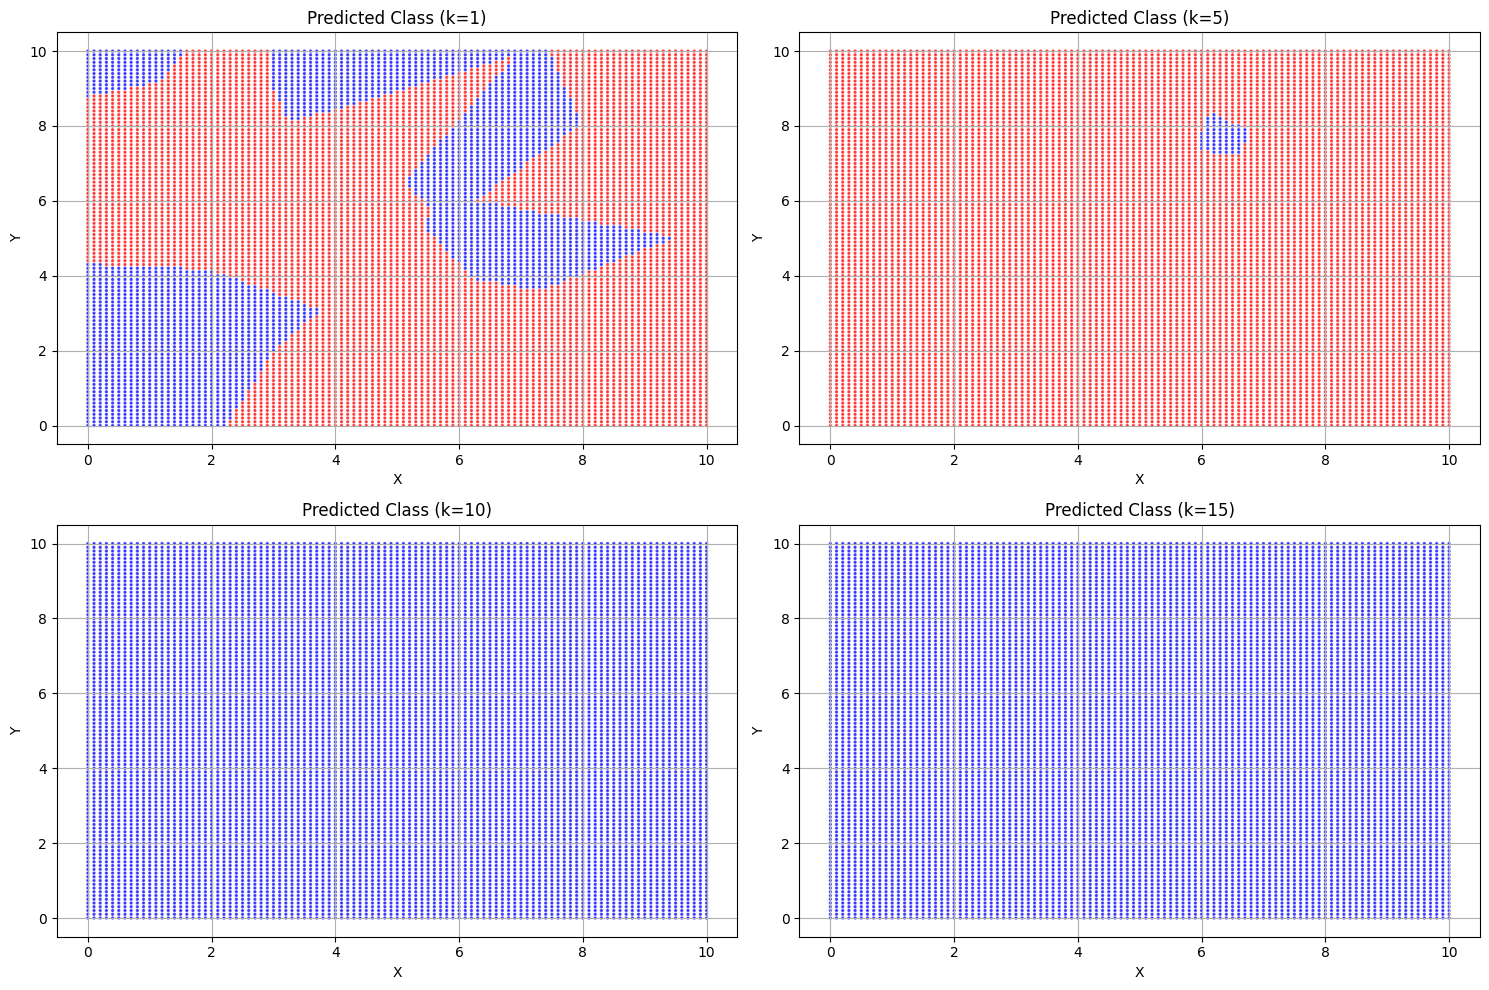

In [ ]:
#A5
plt.figure(figsize=(15, 10))
for idx, k in enumerate([1, 5, 10, 15], start=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_preds = knn.predict(test_points)

    plt.subplot(2, 2, idx)
    plt.scatter(test_points[:, 0], test_points[:, 1], c=test_preds, cmap='bwr', s=2, alpha=0.6)
    plt.title(f"Predicted Class (k={k})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)

plt.tight_layout()
plt.show()

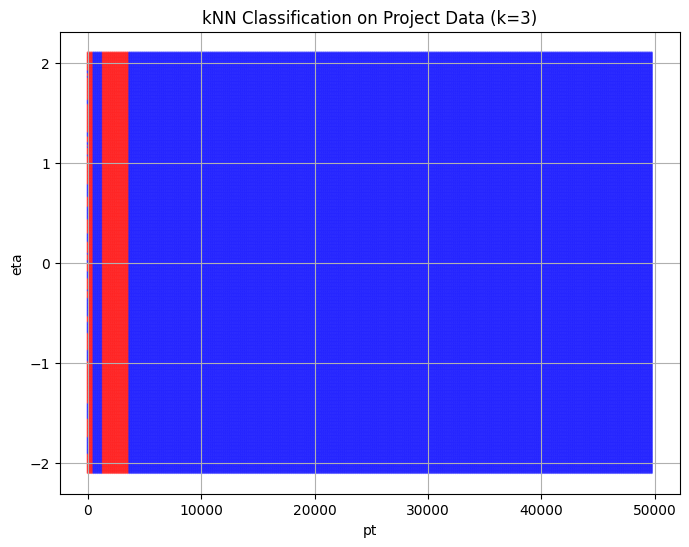

In [ ]:
#A6

project_X = df[['pt', 'eta']].values
project_y = (df['Q'] > 0).astype(int).values

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(project_X, project_y)

grid_x, grid_y = np.meshgrid(np.linspace(project_X[:,0].min(), project_X[:,0].max(), 300),
                             np.linspace(project_X[:,1].min(), project_X[:,1].max(), 300))
grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_preds = knn.predict(grid_points)

plt.figure(figsize=(8, 6))
plt.scatter(grid_points[:, 0], grid_points[:, 1], c=grid_preds, cmap='bwr', s=1, alpha=0.5)
plt.title("kNN Classification on Project Data (k=3)")
plt.xlabel("pt")
plt.ylabel("eta")
plt.grid(True)
plt.show()

In [ ]:
#A7
param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(project_X, project_y)

print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

Best k value: 29
Best CV Score: 0.5181
